### Ad Ease website Analytics

#### Dataset: Web Traffic Time Series Forecasting

Forecasting the future values of multiple time series. More specifically the problem of forecasting future web traffic for approximately 145,000 articles on britanica.

The training dataset consists of approximately 145k time series. Each of these time series represent a number of daily views of a different article, starting from July, 1st, 2015 up until December 31st, 2016. For each time series, you are provided the name of the article as well as the type of traffic that this time series represent (all, mobile, desktop, spider). You may use this metadata and any other publicly available data to make predictions. Unfortunately, the data source for this dataset does not distinguish between traffic values of zero and missing values. A missing value may mean the traffic was zero or that the data is not available for that day.

### Problem Statement: 

Ad Ease is an ads and marketing-based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients.

In [1]:
### Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from imblearn.over_sampling import SMOTE

In [8]:
import gdown
url='https://drive.google.com/file/d/1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm/view?usp=sharing'

ider=url.split('/')[-2]
!gdown --id $ider

c:\users\viraj\anaconda3\lib\site-packages\gdown\cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm
To: D:\Scaler Case study\AdEase Time Series\new_train.csv

  0%|          | 0.00/425M [00:00<?, ?B/s]
  0%|          | 524k/425M [00:00<06:58, 1.01MB/s]
  0%|          | 1.05M/425M [00:00<06:06, 1.16MB/s]
  0%|          | 1.57M/425M [00:01<05:03, 1.39MB/s]
  0%|          | 2.10M/425M [00:01<04:07, 1.71MB/s]
  1%|          | 2.62M/425M [00:01<03:21, 2.09MB/s]
  1%|          | 3.67M/425M [00:01<02:50, 2.47MB/s]
  1%|1         | 4.72M/425M [00:01<02:12, 3.17MB/s]
  1%|1         | 5.77M/425M [00:01<01:57, 3.57MB/s]
  1%|1         | 6.29M/425M [00:02<02:37, 2.65MB/s]
  2%|1         | 6.82M/425M [00:02<02:40, 2.60MB/s]
  2%|1         | 7.34M/425M [00:02<02:29, 2.79MB/s]
  2%|1         | 7.86M

 68%|######8   | 291M/425M [02:35<01:25, 1.57MB/s]
 69%|######8   | 292M/425M [02:36<01:30, 1.47MB/s]
 69%|######8   | 292M/425M [02:36<01:27, 1.51MB/s]
 69%|######8   | 293M/425M [02:36<01:31, 1.44MB/s]
 69%|######8   | 293M/425M [02:37<01:19, 1.65MB/s]
 69%|######9   | 294M/425M [02:37<01:33, 1.41MB/s]
 69%|######9   | 294M/425M [02:38<01:30, 1.45MB/s]
 69%|######9   | 295M/425M [02:38<01:36, 1.35MB/s]
 69%|######9   | 295M/425M [02:38<01:30, 1.43MB/s]
 70%|######9   | 296M/425M [02:39<01:21, 1.59MB/s]
 70%|######9   | 296M/425M [02:39<01:18, 1.65MB/s]
 70%|######9   | 297M/425M [02:39<01:17, 1.65MB/s]
 70%|######9   | 297M/425M [02:39<01:11, 1.80MB/s]
 70%|#######   | 298M/425M [02:40<01:10, 1.79MB/s]
 70%|#######   | 298M/425M [02:40<01:32, 1.37MB/s]
 70%|#######   | 299M/425M [02:41<01:27, 1.45MB/s]
 70%|#######   | 299M/425M [02:41<01:15, 1.65MB/s]
 71%|#######   | 300M/425M [02:41<01:19, 1.57MB/s]
 71%|#######   | 300M/425M [02:41<01:19, 1.56MB/s]
 71%|#######   | 301M/425M [02:

In [9]:
data = pd.read_csv('new_train.csv')

In [10]:
df = data.copy(deep = True)
df.drop_duplicates(keep='last', inplace = True)

In [11]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.britanica.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


### Analyzing basic metrics

In [12]:
df.shape #The dataset has 145063 rows and 551 columns

(145063, 551)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 610.9+ MB


In [14]:
#Checking data types of each column

df.dtypes

Page           object
2015-07-01    float64
2015-07-02    float64
2015-07-03    float64
2015-07-04    float64
               ...   
2016-12-27    float64
2016-12-28    float64
2016-12-29    float64
2016-12-30    float64
2016-12-31    float64
Length: 551, dtype: object

In [15]:
df.nunique() #Checking unique values in each column

Page          145063
2015-07-01      6898
2015-07-02      6823
2015-07-03      6707
2015-07-04      6995
               ...  
2016-12-27      8938
2016-12-28      8819
2016-12-29      8761
2016-12-30      8733
2016-12-31      8826
Length: 551, dtype: int64

In [16]:
#Checking Stastical summary of the data

df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


### Checking missing values

In [17]:
(df.isna().sum()/len(df))*100

Page           0.000000
2015-07-01    14.297236
2015-07-02    14.349627
2015-07-03    14.162123
2015-07-04    14.237952
                ...    
2016-12-27     2.551305
2016-12-28     2.634717
2016-12-29     2.637475
2016-12-30     2.505808
2016-12-31     2.388617
Length: 551, dtype: float64

In [18]:
df.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

#### Plotting null values v/s days

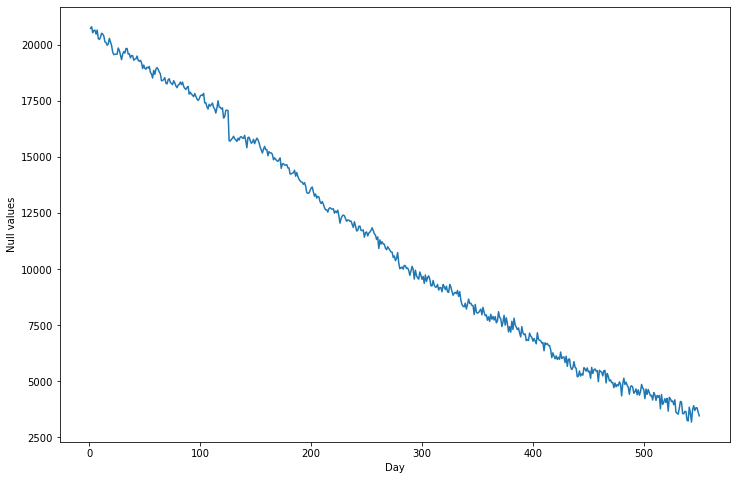

In [22]:
day = [x for x in range(1, len(df.columns))]
plt.figure(figsize=(12,8))
plt.xlabel('Day')
plt.ylabel('Null values')
plt.plot(day, df.isnull().sum()[1:])

In [23]:
## We can drop the rows where missing values are very high. We will set threshold to 300

df.dropna(thresh=300,inplace=True)

In [24]:
df.shape

(133617, 551)

In [25]:
## For remaining we can fill the missing values with zero

df.fillna(0, inplace = True)

In [26]:
df.isnull().sum()

Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 551, dtype: int64

### Exploratory Data Analysis

#### Separating the data - Extracting Language, Access_Type and Access_Origin from Page column

In [33]:
# Extracting Language

import re

def extract_language(Lan):
    match = re.search(r'_(.{2}).britanica.org_', Lan)
    return match.group(1) if match else 'Other Language'

df['Language'] = df['Page'].apply(extract_language)

In [34]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
5,5566_zh.britanica.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0,zh


In [39]:
#df['Language'].contains("wikipedia")
#df['Language'].str.contains('wikipedia').any()
(df['Language'].eq('wikipedia')).any()

False

In [35]:
df['Language'].value_counts() #Checking the counts of Language code after extracting

en                22486
ja                19295
de                17362
fr                16948
zh                15211
Other Language    14494
ru                14270
es                13551
Name: Language, dtype: int64

In [40]:
#Mapping Language code with Language name for better understanding

lang = {'en': 'English', 'ja': 'Japanense', 'de': 'German', 'fr': 'French', 'zh': 'Chinese', 'ru': 'Russian', 'es': 'Spanish',
       'Other Language': 'Other Language'}

df['Language'] = df['Language'].map(lang)

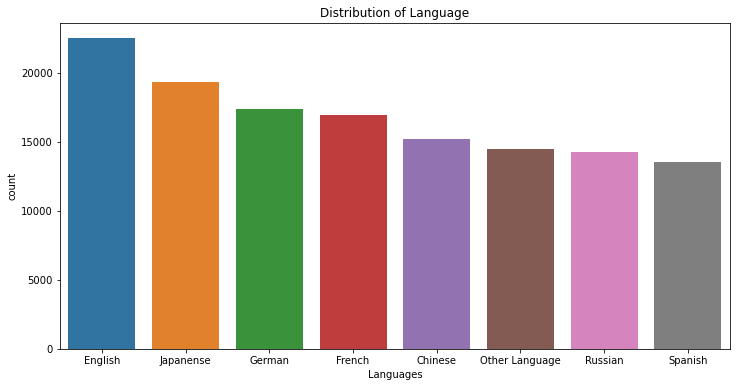

In [42]:
#Plotting Language counts

plt.figure(figsize=(12,6))
sns.countplot(x='Language',data=df,order=df['Language'].value_counts().index)
plt.title("Distribution of Language")
plt.xlabel("Languages")
plt.show()

In [43]:
# Extracting Access Type

def access_type(name):
    match = re.search(r'(all-access|mobile-web|desktop)', name)
    return match.group(1) if match else 'Unknown_accessType'

df['access_type'] = df['Page'].apply(access_type)

In [44]:
df['access_type'].value_counts() #Checking the counts of each Access Type

all-access    68718
mobile-web    33299
desktop       31600
Name: access_type, dtype: int64

In [45]:
# Extracting Access Origin

def get_access_origin(name):
    match = re.search(r'[ai].org_(.*)_(.*)$', name)
    return match.group(2) if match else 'No Access_origin'

df['access_origin'] = df['Page'].apply(get_access_origin)

In [46]:
df['access_origin'].value_counts() #Checking the counts of Access Origin

all-agents    101303
spider         32314
Name: access_origin, dtype: int64

In [47]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language,access_type,access_origin
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,Chinese,all-access,spider
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,Chinese,all-access,spider
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,Chinese,all-access,spider
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,Chinese,all-access,spider
5,5566_zh.britanica.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,17.0,32.0,19.0,23.0,17.0,17.0,50.0,Chinese,all-access,spider


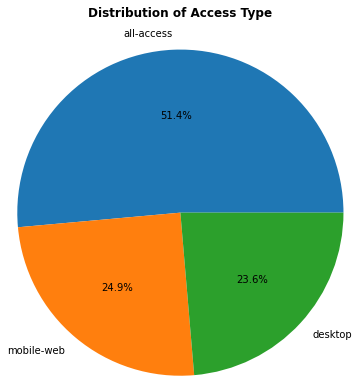

In [51]:
#Plotting Access Type

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.title("Distribution of Access Type", fontweight='bold', y=1.2)
plt.pie(x=df['access_type'].value_counts().values, labels=df['access_type'].value_counts().index, radius=1.5, autopct='%0.1f%%')
plt.show()

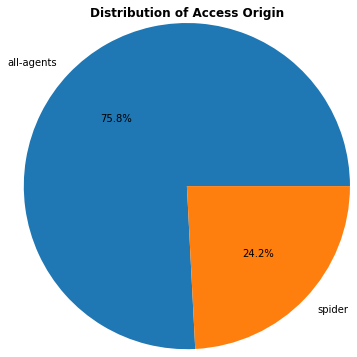

In [52]:
#Plotting Access Origin

plt.figure(figsize=(6, 5))
plt.title("Distribution of Access Origin", fontweight='bold', y=1.1)
plt.pie(x=df['access_origin'].value_counts().values,labels=df['access_origin'].value_counts().index,radius=1.5,autopct='%0.1f%%')
plt.show()

### Aggregating data on Language and Pivoting the data

In [54]:
df_lang = pd.DataFrame()
df_lang = df.groupby('Language').mean().transpose()
df_lang.reset_index(inplace = True)
df_lang.set_index('index', inplace = True)

### Plotting the Time series data for each Language at once

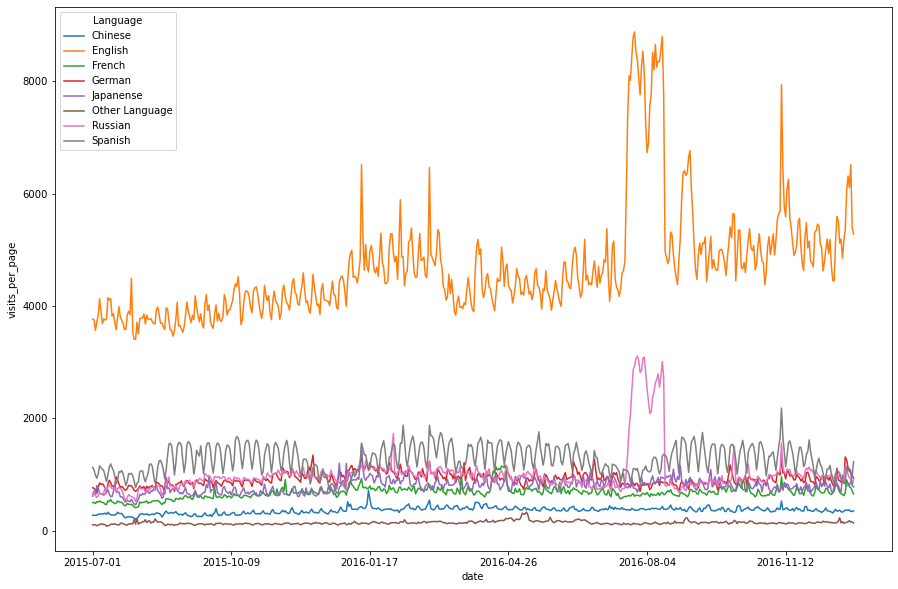

In [55]:
df_lang.plot(label=df_lang.columns,figsize=(15,10))
plt.xlabel("date")
plt.ylabel("visits_per_page")
plt.show()

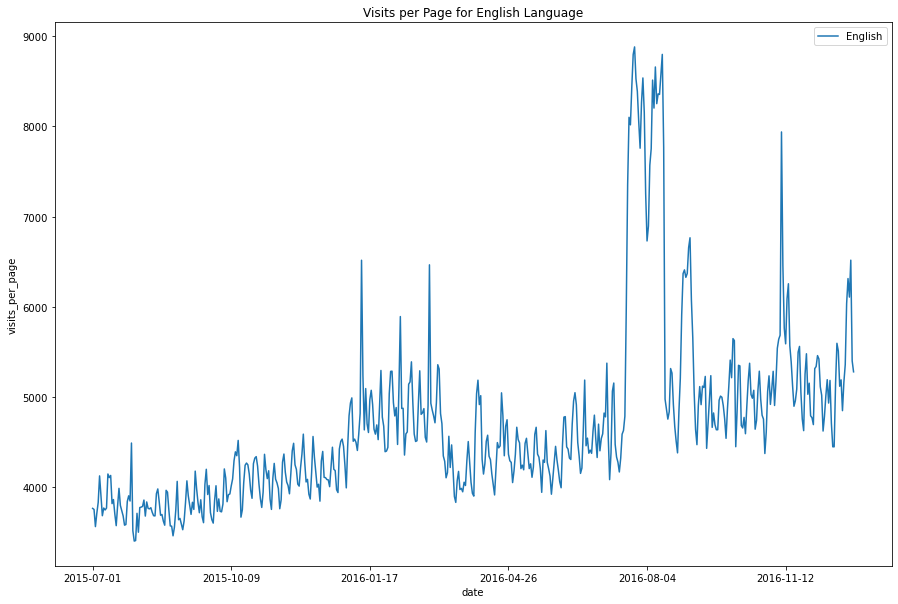

In [56]:
#Plotting for English language

english_data = df_lang['English']

# Plotting only for English language
english_data.plot(figsize=(15, 10), label='English')
plt.xlabel("date")
plt.ylabel("visits_per_page")
plt.title("Visits per Page for English Language")
plt.legend()
plt.show()

<ul>
<li>English is the language which has highest views than any other languages</li>
<li>Chinese and Other language have lowest number of views</li>
<li>Spanish has 2nd highest views, followed by German and Russian</li>
</ul>

### Checking the stationarity using Augmented Dickey Fuller test

In [89]:
from statsmodels.tsa.stattools import adfuller

In [90]:
def adf_test(df, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(df)[1]
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

In [91]:
adf_test(df_lang['English'])

Sequence is not stationary


In [92]:
adf_test(df_lang['Chinese'])

Sequence is not stationary


In [93]:
adf_test(df_lang['French'])

Sequence is stationary


In [94]:
adf_test(df_lang['German'])

Sequence is not stationary


In [95]:
adf_test(df_lang['Japanense'])

Sequence is not stationary


In [96]:
adf_test(df_lang['Russian'])

Sequence is stationary


In [97]:
adf_test(df_lang['Spanish'])

Sequence is stationary


### Making the time series stationary

#### Removing trend and seasonality with decomposition

In [98]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

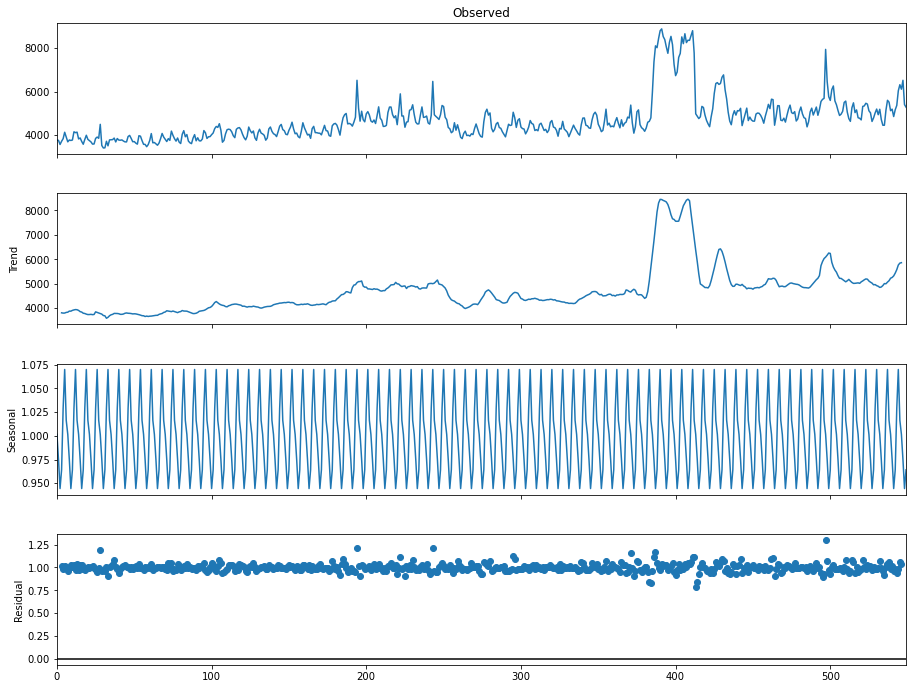

In [99]:
decom_english = df_lang.English.values
decomposition = seasonal_decompose(decom_english, model='multiplicative',period = 7)

fig = decomposition.plot()
fig.set_size_inches((14, 11))

In [102]:
residuals = decomposition.resid
residuals_no_nan = residuals[~np.isnan(residuals)]
adf_result = adfuller(residuals_no_nan)
print("p-value:", adf_result[1])

p-value: 4.9083374834912056e-18


### Remove trend and seasonality with differencing

In [103]:
decom_english_diff = pd.DataFrame(decom_english).diff(1)
decom_english_diff.dropna(inplace = True)

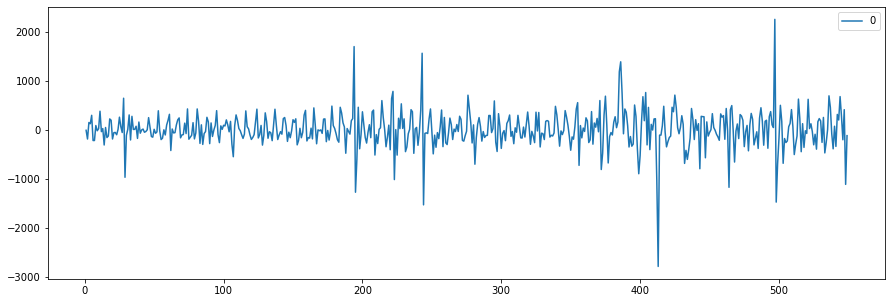

In [104]:
decom_english_diff.plot(figsize=(15, 5))

#### Checking if the time series becomes stationary after one differencing

In [105]:
adf_test(decom_english_diff)

Sequence is stationary


#### Plotting PACF plot without original time series i.e., with de-trending and de-seasoning

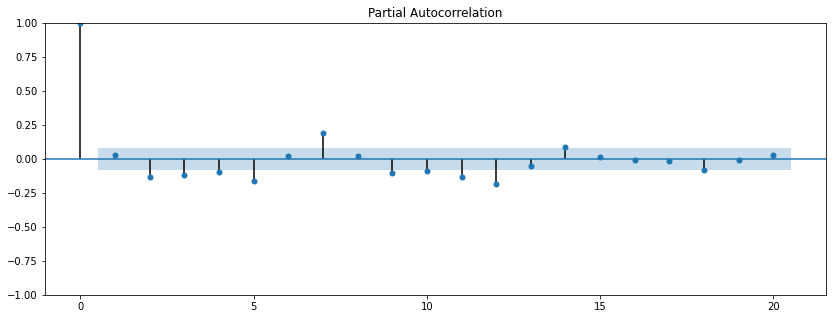

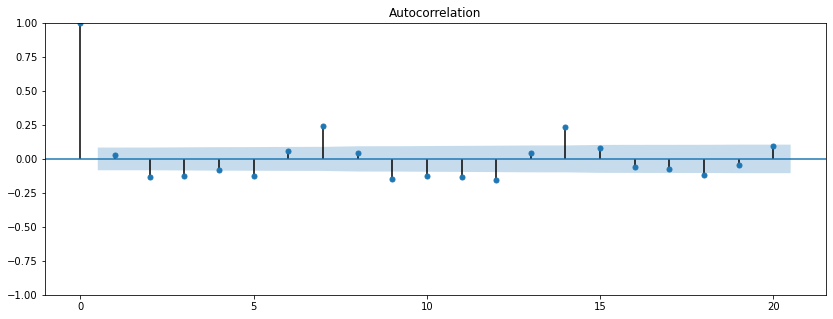

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf=plot_pacf(decom_english_diff,lags=20)
pacf.set_size_inches((14, 5))
acf=plot_acf(decom_english_diff,lags=20)
acf.set_size_inches((14, 5))

## Arima model

In [128]:
from statsmodels.tsa.arima.model import ARIMA

from pandas import DataFrame

from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

In [129]:
# Creating a function to print values of all these metrics.

def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [130]:
#ts = df_lang.English.copy(deep = True)
#model = ARIMA(ts, order=(4,1,3)) #Using value as 4,1 and 3 for p,d and q respectively.
#model_fit = model.fit()

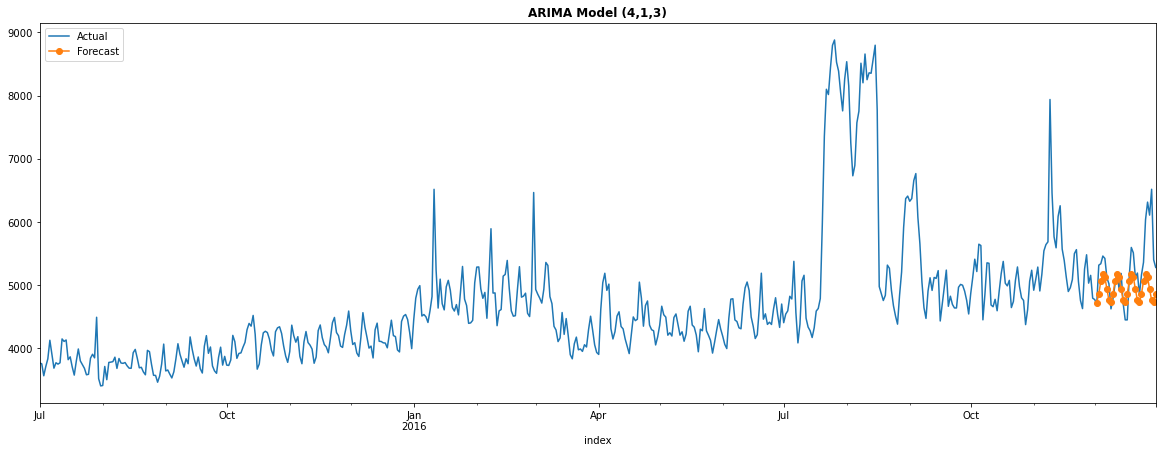

In [134]:
n = 30 #keeping the test set with multiple of seasonality.

ts = df_lang.English.copy(deep = True)
model = ARIMA(ts[:-n], order = (4,1,3)) #ARIMA Model with order(1,1,1)
model = model.fit()

Forecast = model.forecast(steps=n)

ts.index = ts.index.astype('datetime64[ns]')
Forecast.index = Forecast.index.astype('datetime64[ns]')
plt.figure(figsize = (20,7))
ts.plot(label='Actual')
Forecast.plot(label='Forecast',style='-o')
plt.legend(loc="upper left")
plt.title('ARIMA Model (4,1,3)', fontweight='bold')
plt.show()

In [135]:
#Calculating MAPE & RMSE of the model

actual = ts.values[-n:]
error = ts.values[-n:] - Forecast.values
MAPE = np.mean(np.abs(error)/ np.abs(actual))
RMSE = np.sqrt(np.mean(error**2))

print(f'MAPE of Model: {np.round(MAPE,3)}')
print(f'RMSE of Model: {np.round(RMSE,3)}')

MAPE of Model: 0.068
RMSE of Model: 544.618


### SARIMAX model

In [139]:
!gdown 1H9054-eVP9IdANPOblXwX7Nd2r_Sjf1u

Downloading...
From: https://drive.google.com/uc?id=1H9054-eVP9IdANPOblXwX7Nd2r_Sjf1u
To: D:\Scaler Case study\AdEase Time Series\Exog_Campaign_eng

  0%|          | 0.00/1.10k [00:00<?, ?B/s]
100%|##########| 1.10k/1.10k [00:00<00:00, 1.10MB/s]


In [140]:
exo = pd.read_csv('Exog_Campaign_eng')
exo.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [141]:
exog=exo['Exog'].to_numpy()

### We will train a sarimax model with p=4,d=1,q=3, P=1,D=1,Q=1 and S=7

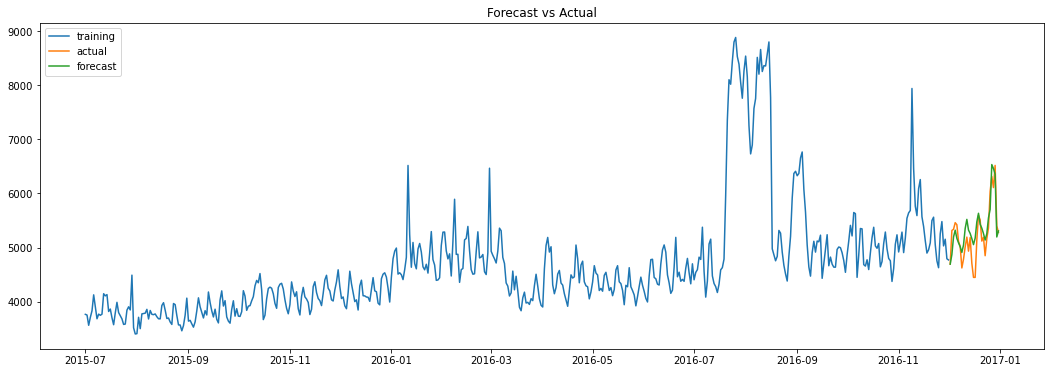

In [152]:
import statsmodels.api as sm
train=ts[:520]
test=ts[520:]
model=sm.tsa.statespace.SARIMAX(train,order=(4, 1, 3),seasonal_order=(1,1,1,7),exog=exog[:520])
results=model.fit()

fc=results.forecast(30,dynamic=True,exog=pd.DataFrame(exog[520:]))
fc_series = pd.Series(fc)

train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plt.figure(figsize=(18,6))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=10)

In [145]:
#Calculating MAPE & RMSE of the model

mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("MAPE of model:",mape)
print("RMSE of model:",rmse)

MAPE of model: 0.046613810794435585
RMSE of model: 293.7482997389467


### Hyperparamter tuning for SARIMAX model for English Pages

In [153]:
def grid_search(ts, n, param, d_parameter, s_parameter, exog=[]):
    param_df = pd.DataFrame(columns=['pdq', 'PDQs', 'MAPE', 'RMSE'])

    counter = 0
    for p in param:
        for d in d_parameter:
            for q in param:
                for P in param:
                    for D in d_parameter:
                        for Q in param:
                            for s in s_parameter:

                                model = SARIMAX(ts[:-n], order=(p, d, q),seasonal_order=(P, D, Q, s),exog=exog[:-n],
                                                enforce_stationarity=False)
                                model_fit = model.fit()

                                # Creating forecast from Model
                                model_forecast = model_fit.forecast(n, dynamic=True, exog=pd.DataFrame(exog[-n:]))

                                # Calculating errors
                                actual = ts.values[-n:]
                                errors = actual - model_forecast.values

                                MAPE = np.mean(np.abs(errors) / np.abs(actual))
                                RMSE = np.sqrt(np.mean(errors**2))
                                MAPE, RMSE = np.round(MAPE, 5), np.round(RMSE, 3)

                                # Storing the results in param_df
                                counter += 1
                                list_row = [(p, d, q), (P, D, Q, s), MAPE, RMSE]
                                param_df.loc[len(param_df)] = list_row


    return param_df

In [154]:
exog = exo['Exog'].to_numpy()
ts = df_lang.English
n = 35
param = [0,1,2]
d_parameter = [0,1]
s_parameter = [7]

english_parameters  = grid_search(ts, n, param, d_parameter, s_parameter, exog)

In [155]:
english_parameters.sort_values(['MAPE','RMSE']).head()

,pdq,PDQs,MAPE,RMSE
52,"(0, 0, 2)","(2, 1, 1, 7)",0.04359,299.719
46,"(0, 0, 2)","(1, 1, 1, 7)",0.04367,279.396
53,"(0, 0, 2)","(2, 1, 2, 7)",0.04454,293.145
311,"(2, 1, 2)","(0, 1, 2, 7)",0.04486,294.412
41,"(0, 0, 2)","(0, 1, 2, 7)",0.04551,313.353


From the grid above the best parameter for English language is pdq = (0,0,2), PDQs = (2,1,1,7)

### Checking hyper parameters for other languages

In [156]:
def sarimax_grid(languages, df_lang, n, param, d_parameter, s_parameter):

    best_param_df  = pd.DataFrame(columns = ['language','p','d', 'q', 'P','D','Q','s','MAPE'])
    for lang in languages:

        print(f'Finding best parameters for {lang}')
        counter = 0
        ts = df_lang[lang]
        max_MAPE = 100

        for p in param:
            for d in d_param:
                for q in param:
                    for P in param:
                        for D in d_param:
                            for Q in param:
                                for s in s_param:
                                    model = SARIMAX(ts[:-n],order=(p,d,q), seasonal_order=(P, D, Q, s),
                                                    enforce_stationarity=False)
                                    model_fit = model.fit()

                                    model_forecast = model_fit.forecast(n, dynamic = True)

                                    #Calculating errors for results
                                    actual = ts.values[-n:]
                                    errors = ts.values[-n:] - model_forecast.values

                                    MAPE = np.mean(np.abs(errors)/ np.abs(actual))

                                    counter += 1

                                    if (MAPE < max_MAPE):
                                        max_MAPE = MAPE
                                        best_p = p
                                        best_d = d
                                        best_q = q
                                        best_P = P
                                        best_D = D
                                        best_Q = Q
                                        best_s = s
                                    else: pass


        best_mape = np.round(max_MAPE, 5)

        print(f'Minimum MAPE for {lang} = {max_MAPE}')
        print(f'Best Parameters are {best_p , best_d, best_q, best_P, best_D, best_Q, best_s}')

        best_param_row = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, max_MAPE]
        best_param_df.loc[len(best_param_df)] = best_param_row

    return best_param_df

In [158]:
#calculating the hyper parameters for other languages

languages = ['Chinese','German','Japanense','French', 'Spanish', 'Russian','Other Language']

n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]

best_param_df = sarimax_grid(languages, df_lang, n, param, d_parameter, s_parameter)

Finding best parameters for Chinese
Minimum MAPE for Chinese = 0.033469369349599806
Best Parameters are (0, 1, 1, 0, 0, 2, 7)
Finding best parameters for German
Minimum MAPE for German = 0.065585221086864
Best Parameters are (2, 1, 0, 0, 1, 1, 7)
Finding best parameters for Japanense
Minimum MAPE for Japanense = 0.07239737608144527
Best Parameters are (2, 0, 1, 1, 0, 1, 7)
Finding best parameters for French
Minimum MAPE for French = 0.059596800130335206
Best Parameters are (0, 0, 2, 2, 1, 2, 7)
Finding best parameters for Spanish
Minimum MAPE for Spanish = 0.0809333983565705
Best Parameters are (2, 1, 0, 2, 1, 0, 7)
Finding best parameters for Russian
Minimum MAPE for Russian = 0.04436165402488546
Best Parameters are (0, 0, 2, 1, 0, 2, 7)
Finding best parameters for Other Language
Minimum MAPE for Other Language = 0.06505663442536834
Best Parameters are (2, 0, 1, 1, 0, 2, 7)


In [159]:
#Displaying the best parameters for all Languages in ascending order

best_param_df.sort_values(['MAPE'], inplace = True)
best_param_df

,language,p,d,q,P,D,Q,s,MAPE
0,Chinese,0,1,1,0,0,2,7,0.033469
5,Russian,0,0,2,1,0,2,7,0.044362
3,French,0,0,2,2,1,2,7,0.059597
6,Other Language,2,0,1,1,0,2,7,0.065057
1,German,2,1,0,0,1,1,7,0.065585
2,Japanense,2,0,1,1,0,1,7,0.072397
4,Spanish,2,1,0,2,1,0,7,0.080933


### Plotting the graph of SARIMAX for all languages

In [160]:
def plot_SARIMAX(languages, df_lang, n, best_param_df):

    for lang in languages:
        p = best_param_df.loc[best_param_df['language'] == lang, ['p']].values[0][0]
        d = best_param_df.loc[best_param_df['language'] == lang, ['d']].values[0][0]
        q = best_param_df.loc[best_param_df['language'] == lang, ['q']].values[0][0]
        P = best_param_df.loc[best_param_df['language'] == lang, ['P']].values[0][0]
        D = best_param_df.loc[best_param_df['language'] == lang, ['D']].values[0][0]
        Q = best_param_df.loc[best_param_df['language'] == lang, ['Q']].values[0][0]
        s = best_param_df.loc[best_param_df['language'] == lang, ['s']].values[0][0]

        ts = df_lang[lang]


        model = SARIMAX(ts[:-n], order =(p,d,q), seasonal_order=(P, D, Q, s), enforce_stationarity=False)
        model_fit = model.fit()

        model_forecast = model_fit.forecast(n, dynamic = True)

        actual = ts.values[-n:]
        errors = ts.values[-n:] - model_forecast.values

        MAPE = np.mean(np.abs(errors)/ np.abs(actual))
        RMSE = np.sqrt(np.mean(errors**2))

        print(f'SARIMAX model for {lang} Time Series')
        print(f'Parameters of Model: ({p},{d},{q}) ({P},{D},{Q},{s})')
        print(f' MAPE of the  Model: {np.round(MAPE,5)}')
        print(f' RMSE of the Model: {np.round(RMSE,3)}')

        ts.index = ts.index.astype('datetime64[ns]')
        model_forecast.index = model_forecast.index.astype('datetime64[ns]')
        plt.figure(figsize = (22,7))
        ts[-60:].plot(label = 'Actual')
        model_forecast[-60:].plot(label='Forecast', style='-o')
        plt.legend(loc="upper left")
        plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontweight = 'bold')
        plt.show()

    return None

SARIMAX model for Chinese Time Series
Parameters of Model: (0,1,1) (0,0,2,7)
 MAPE of the  Model: 0.03347
 RMSE of the Model: 16.414


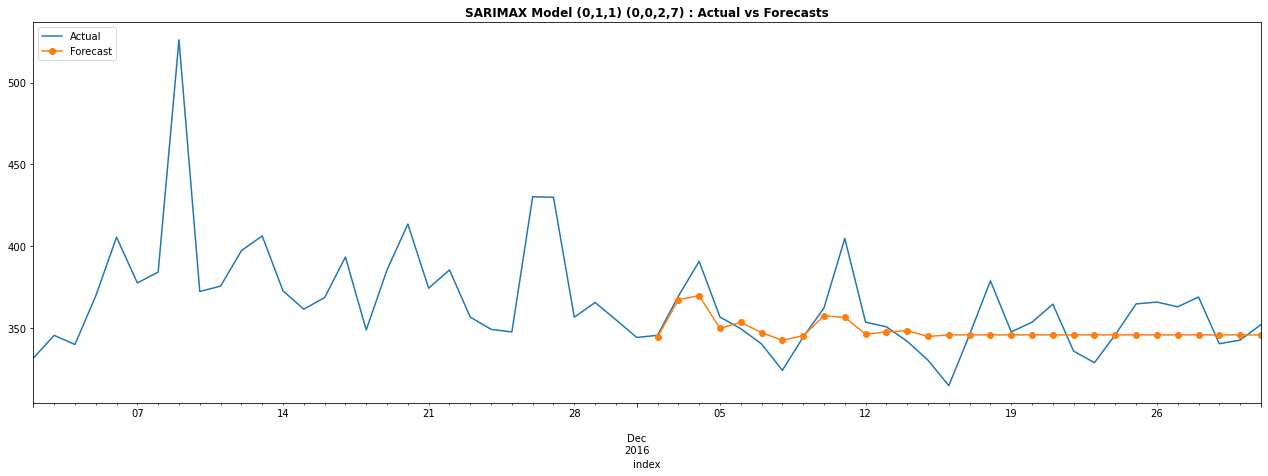

SARIMAX model for German Time Series
Parameters of Model: (2,1,0) (0,1,1,7)
 MAPE of the  Model: 0.06559
 RMSE of the Model: 112.456


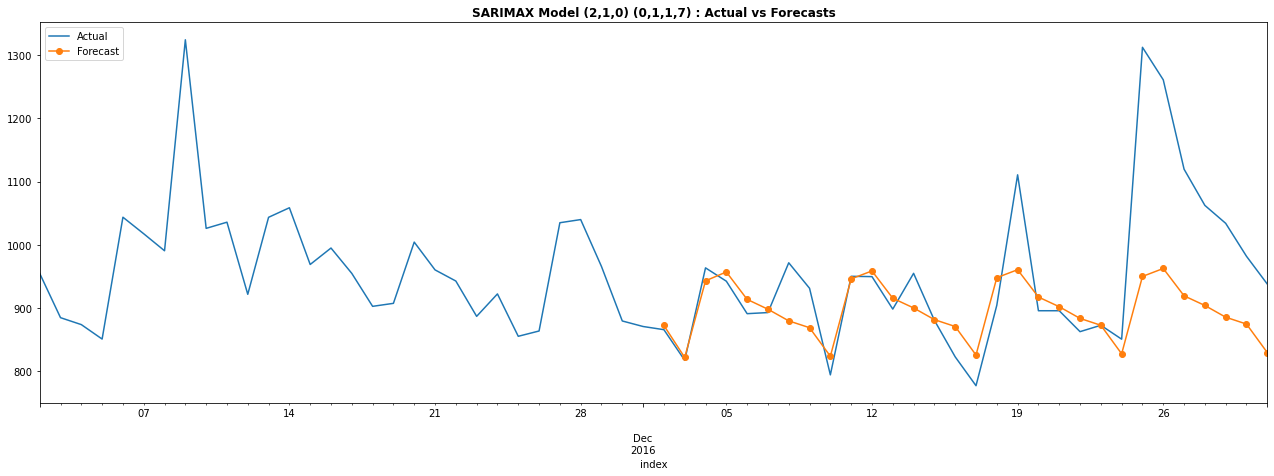

SARIMAX model for Japanense Time Series
Parameters of Model: (2,0,1) (1,0,1,7)
 MAPE of the  Model: 0.0724
 RMSE of the Model: 103.056


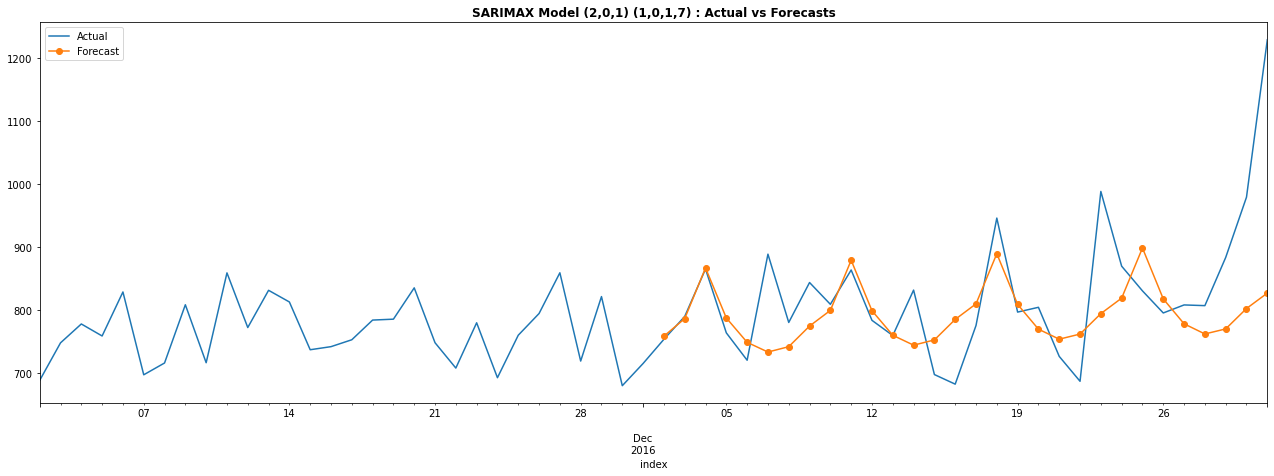

SARIMAX model for French Time Series
Parameters of Model: (0,0,2) (2,1,2,7)
 MAPE of the  Model: 0.0596
 RMSE of the Model: 61.838


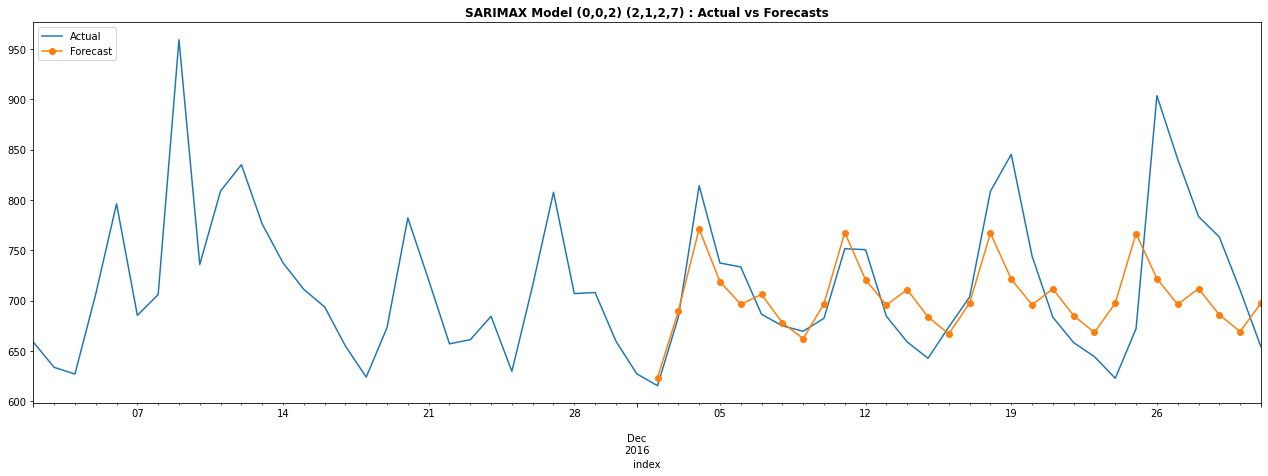

SARIMAX model for Spanish Time Series
Parameters of Model: (2,1,0) (2,1,0,7)
 MAPE of the  Model: 0.08093
 RMSE of the Model: 102.318


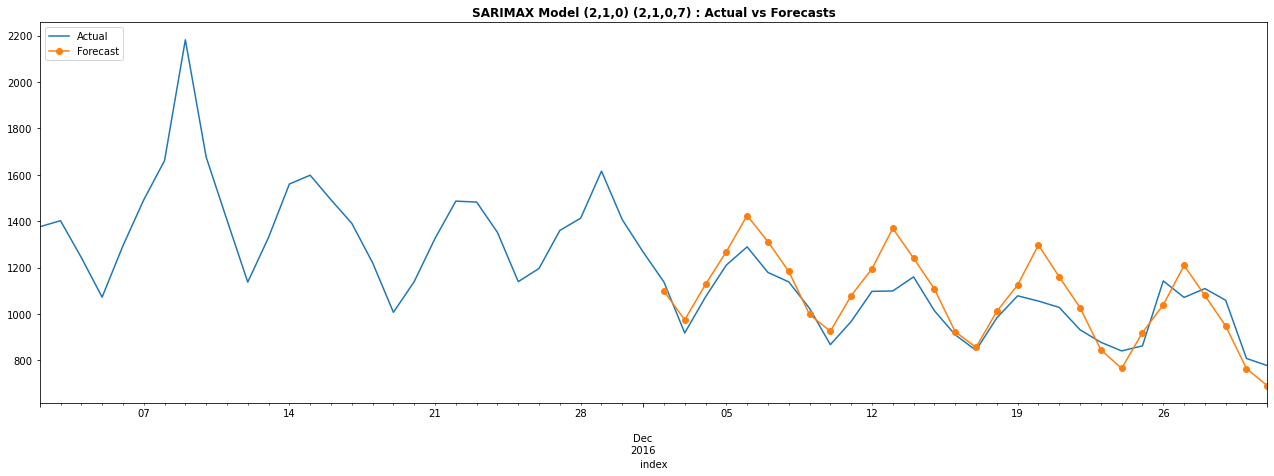

SARIMAX model for Russian Time Series
Parameters of Model: (0,0,2) (1,0,2,7)
 MAPE of the  Model: 0.04436
 RMSE of the Model: 55.786


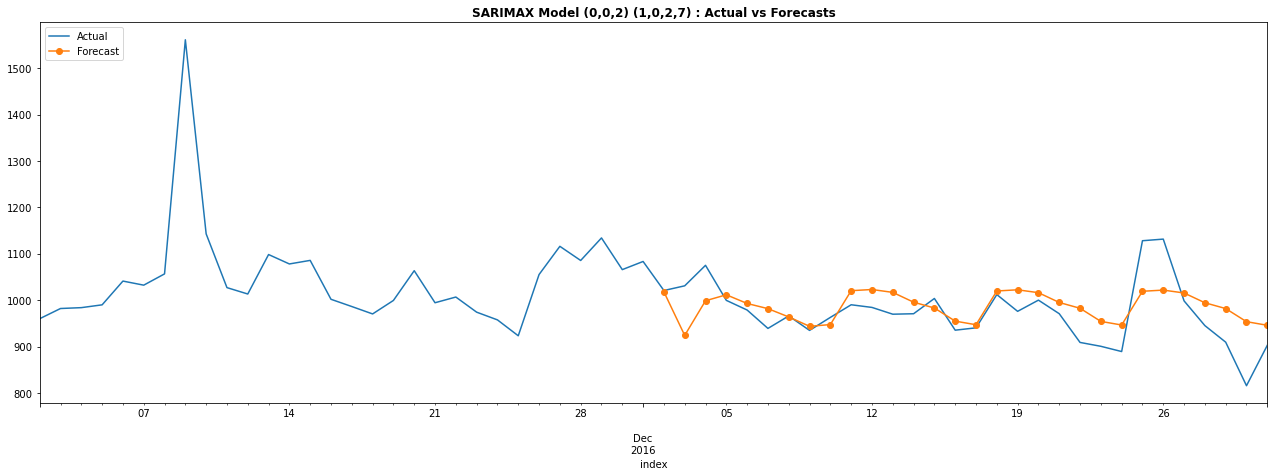

SARIMAX model for Other Language Time Series
Parameters of Model: (2,0,1) (1,0,2,7)
 MAPE of the  Model: 0.06506
 RMSE of the Model: 18.863


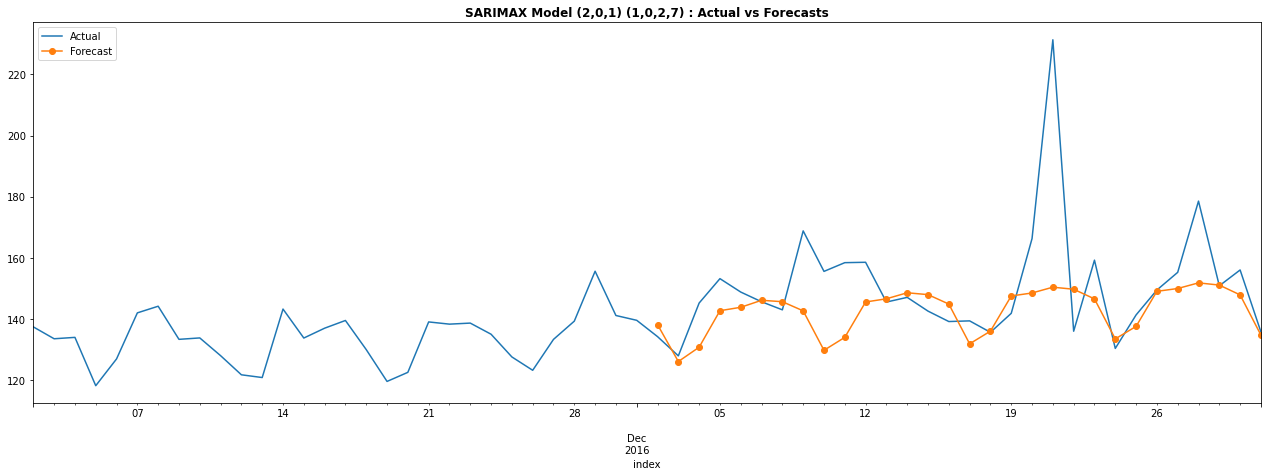

In [161]:
#Plotting SARIMAX model for each Language Time Series
languages = ['Chinese','German','Japanense','French', 'Spanish', 'Russian','Other Language']
n = 30
plot_SARIMAX(languages, df_lang, n, best_param_df)

### Insights and Recommendations
#1) English is the language which has highest views than any other languages. Chinese and Other language have lowest number of views. So maximum ads can be shown on English pages to increase the click rate.

#2) Chinese and Other languages have less views and thus limited advertisements must be shown or should be shown to some targeted audience only.

#3) Spanish, Russian, French and German have decent amount of views. Ads can be shown to the target audience frequently to increase the click rate.

#4) 'All-access' has the highest distribution of Access type. Mobile-web and desktop have almost same distribution which is 25%.

#5) 'All agents' contributes to 75.8% of Access origin as compared to spider which is at 24.2%.

#6) As per our analysis English is the language which has the highest views, while Chinese has the lowest views. Moreover, below is the comparison: English > Spanish > Russian > German > Japenese > French > Chinese